In [53]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import tensorflow.keras
from tensorflow.keras import layers
import yfinance as yf
from keras.models import Model
from keras.layers import Input, LSTM, Dense, concatenate, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [2]:
stock_data = yf.download('IVV','2008-08-08','2010-06-30')


[*********************100%***********************]  1 of 1 completed


In [3]:
def lstm_preprocess(window_size,df):
    close_prices = stock_data['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    train_data = scaled_data[0: training_data_len, :]
    x_train = []
    y_train = []

    for i in range(window, len(train_data)):
        x_train.append(train_data[i-window:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train,y_train,scaled_data,training_data_len,scaler,values

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

def lstm_init(x_train):
    input_shape = (x_train.shape[1], 1)

    input_layer = layers.Input(shape=input_shape)
    lstm_1 = layers.LSTM(100, return_sequences=True)(input_layer)
    lstm_2 = layers.LSTM(100, return_sequences=False)(lstm_1)
    dense_1 = layers.Dense(35, activation='relu')(lstm_2)
    output_layer = layers.Dense(1, activation='linear')(dense_1)
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    return model

In [72]:
def model_fit(x_train,y_train):
    
    early_stopping = EarlyStopping(monitor='loss', patience=5)    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 32, epochs=50,callbacks=[early_stopping])
    
    
    return model

In [74]:
def model_test(scaled_data,window,model,training_data_len,values,scaler):
    test_data = scaled_data[training_data_len-window: , : ]
    x_test = []
    y_test = values[training_data_len:]

    for i in range(window, len(test_data)):
        x_test.append(test_data[i-window:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    return predictions, rmse,y_test

In [98]:
window_size=14
count=0
performance=[]


for window in range(2,(window_size),2):
    x_train,y_train,scaled_data,training_data_len,scaler1,values=lstm_preprocess(window,stock_data)
    model=lstm_init(x_train)
    model=model_fit(x_train,y_train)
    predictions, rmse, y_test=model_test(scaled_data,window,model,training_data_len,values,scaler1)
    performance.append([window, rmse,predictions])



Epoch 1/50
379/379 [==============================] - 14s 37ms/sample - loss: 0.1837
Epoch 2/50
379/379 [==============================] - 0s 682us/sample - loss: 0.0371
Epoch 3/50
379/379 [==============================] - 0s 668us/sample - loss: 0.0201
Epoch 4/50
379/379 [==============================] - 0s 648us/sample - loss: 0.0149
Epoch 5/50
379/379 [==============================] - 0s 672us/sample - loss: 0.0091
Epoch 6/50
379/379 [==============================] - 0s 656us/sample - loss: 0.0057
Epoch 7/50
379/379 [==============================] - 0s 677us/sample - loss: 0.0033
Epoch 8/50
379/379 [==============================] - 0s 670us/sample - loss: 0.0020
Epoch 9/50
379/379 [==============================] - 0s 678us/sample - loss: 0.0017
Epoch 10/50
379/379 [==============================] - 0s 659us/sample - loss: 0.0017
Epoch 11/50
379/379 [==============================] - 0s 671us/sample - loss: 0.0016
Epoch 12/50
379/379 [==============================] - 0s 695us

371/371 [==============================] - 1s 3ms/sample - loss: 0.0032
Epoch 21/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0032
Epoch 22/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0031
Epoch 23/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0030
Epoch 24/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0030
Epoch 25/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0029
Epoch 26/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0029
Epoch 27/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0031
Epoch 28/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0030
Epoch 29/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0033
Epoch 30/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0035
Epoch 31/50
371/371 [==============================] - 1s 3ms/sample - loss: 0.0029
Epoc

C:\Users\BK\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


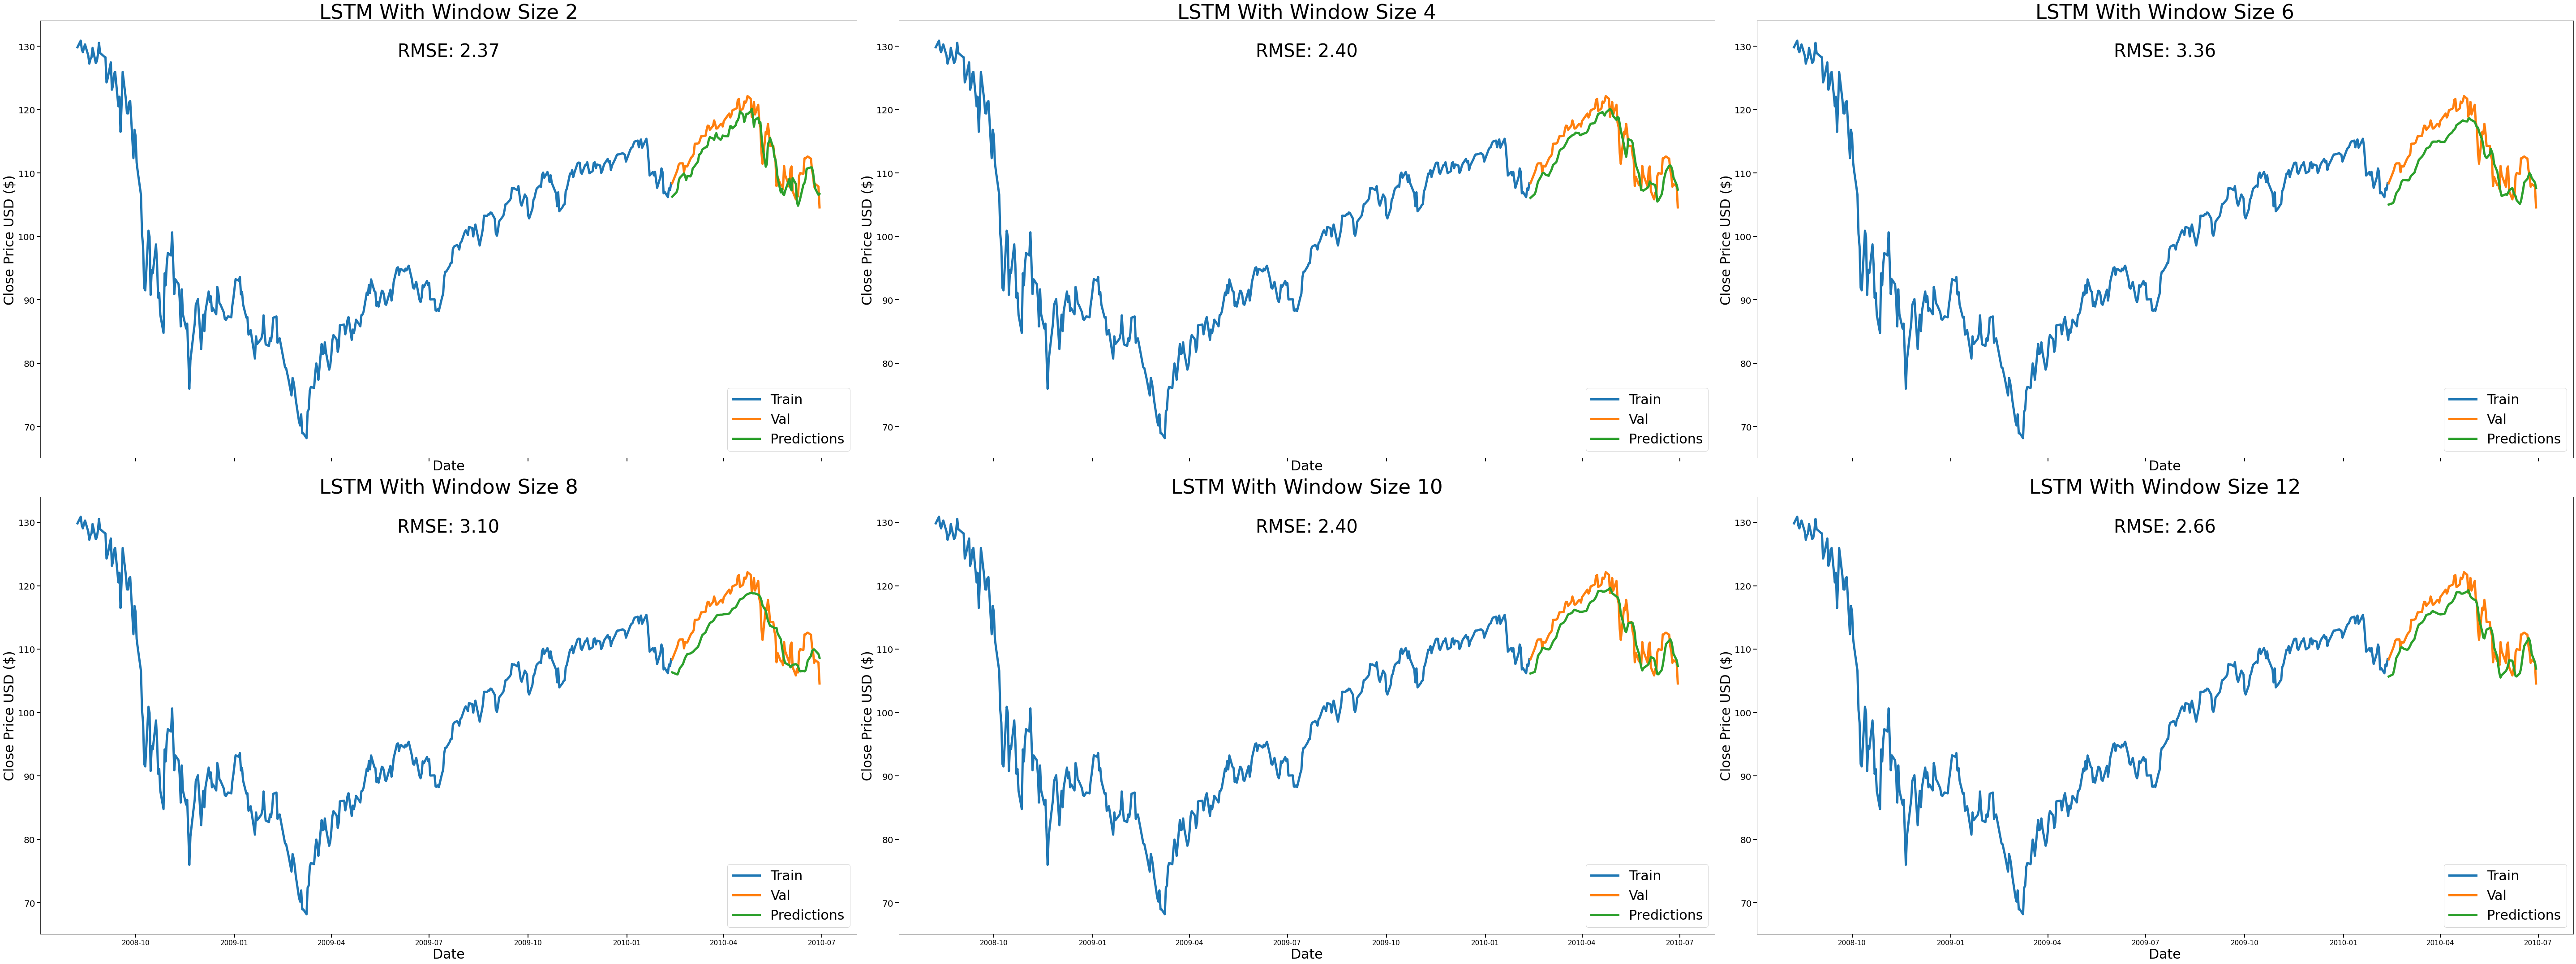

In [102]:
row=2
col=3
num_subplots=row*col


fig, axs = plt.subplots(row, col, figsize=(80, 30),sharex=True)
# stock_data_2=stock_data.set_index("Date")
data = stock_data.filter(['Close'])
train = data[:training_data_len]

    
    
for i, ax in enumerate(axs.flat):
    if i < num_subplots:

        validation = data[training_data_len:]
        validation['Predictions'] = performance[i][2]
        ax.set_title(f'LSTM With Window Size {performance[i][0]}',fontsize=45)
        ax.set_xlabel('Date',fontsize=30)
        ax.set_ylabel('Close Price USD ($)',fontsize=30)
        ax.plot(train,linewidth=5)
        ax.plot(validation[['Close', 'Predictions']],linewidth=5)
        ax.legend(['Train', 'Val', 'Predictions'], loc='lower right',fontsize=30)
        ax.tick_params(axis='x', which='major', labelsize=15, width=2, length=8)
        ax.tick_params(axis='y', which='major', labelsize=20, width=2, length=8)
        rmse = performance[i][1]

        ax.text(0.5, 0.95, f'RMSE: {rmse:.2f}', transform=ax.transAxes,
                fontsize=40, ha='center', va='top')

        plt.subplots_adjust(hspace=0.2, wspace=0.02)  
plt.tight_layout()  
plt.savefig('LSTM/No Sentiment_100.png',dpi=300)
plt.show()

        
        
        
        
        
        
        
        
     





C:\Users\BK\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


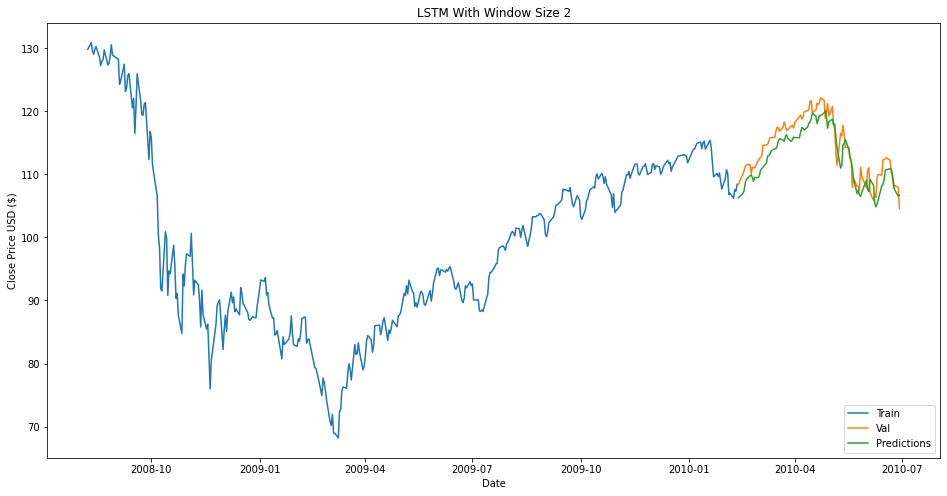

In [100]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = performance[0][2]
plt.figure(figsize=(16,8))
plt.title('LSTM With Window Size 2')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('LSTM/No Sentiment_2.png')

plt.show()


In [101]:
validation['Predictions'] = performance[0][2]
metric_df=validation.reset_index()
metric_df['Month'] = metric_df['Date'].dt.month
monthly_rmse = metric_df.groupby('Month').apply(lambda x: np.sqrt(mean_squared_error(x['Close'], x['Predictions'])))
df_rmse = pd.DataFrame({'Month': monthly_rmse.index, 'LSTM RMSE': monthly_rmse.values}).set_index("Month")
df_rmse

C:\Users\BK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LSTM RMSE
Month,
2,2.204388
3,2.305696
4,2.377085
5,2.503215
6,2.374808
